In [209]:
import pandas as pd

path  = "C:\\Users\\user\\Desktop\\sml_due0311\\vertebral_column_data.csv"
df = pd.read_csv(path)

df["result"].replace({"AB": 1, "NO": 0}, inplace=True)
y =  df["result"]

df1 = df.drop(["result"], axis=1 ) 
df1.count()

df1.head()

,pelvic incidence,pelvic tilt,lumbar lordosis angle,sacral slope,pelvic radius,grade of spondylolisthesis
0,63.03,22.55,39.61,40.48,98.67,-0.25
1,39.06,10.06,25.02,29.00,114.41,4.56
2,68.83,22.22,50.09,46.61,105.99,-3.53
3,69.30,24.65,44.31,44.64,101.87,11.21
4,49.71,9.65,28.32,40.06,108.17,7.92


In [210]:
df1.columns.tolist()

['pelvic incidence',
 'pelvic tilt',
 'lumbar lordosis angle',
 'sacral slope',
 'pelvic radius',
 'grade of spondylolisthesis']

In [211]:
print("Noraml:\n", df[df["result"]==0].count())
print("\n\n")
print("Abnoraml:\n", df[df["result"]==1].count())

Noraml:
 pelvic incidence              100
pelvic tilt                   100
lumbar lordosis angle         100
sacral slope                  100
pelvic radius                 100
grade of spondylolisthesis    100
result                        100
dtype: int64



Abnoraml:
 pelvic incidence              210
pelvic tilt                   210
lumbar lordosis angle         210
sacral slope                  210
pelvic radius                 210
grade of spondylolisthesis    210
result                        210
dtype: int64


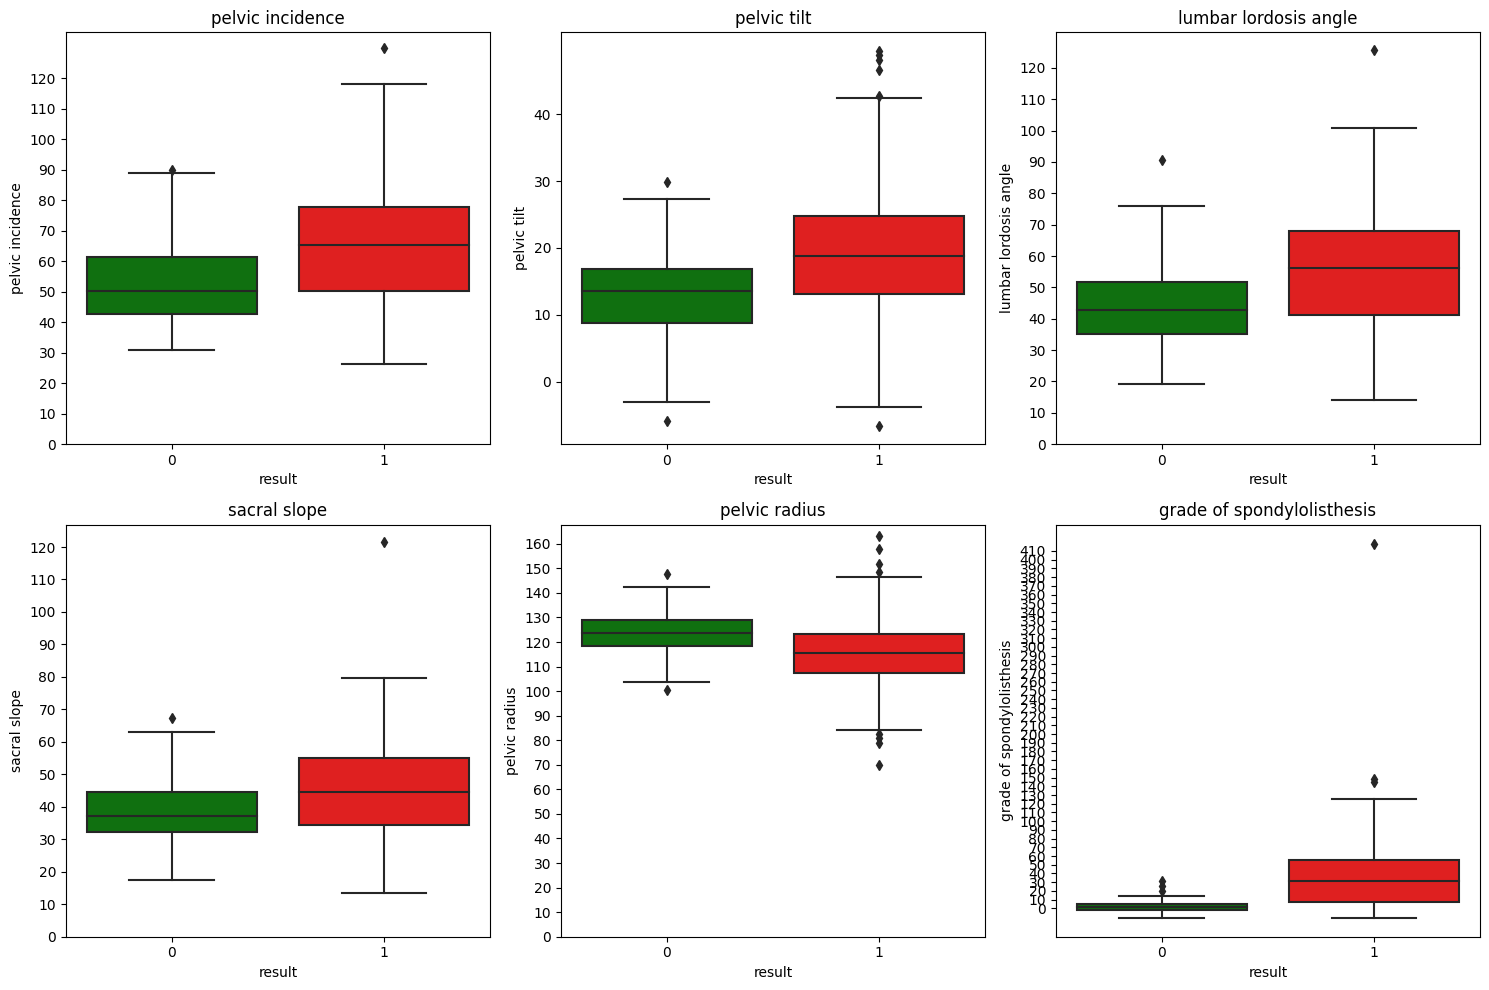

In [212]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a figure with multiple subplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))

# Draw box plots for six different columns
for i, column in enumerate(df.columns[:6]):  
    sns.boxplot(x="result", y=column, data=df, ax=axes[i//3, i%3], palette=['green', 'red'])
    axes[i//3, i%3].set_title(column)
    axes[i//3, i%3].set_yticks(range(0, int(df[column].max())+1, 10))  # Set y-axis ticks every 10 units

# Automatically adjust subplot layout
plt.tight_layout()

# Show the plot
plt.show()


## IQR
### Abnormal
- **Pelvic Incidence**: 50.1 - 77.6
- **Pelvic Tilt**: 13.0 - 24.8
- **Lumbar Lordosis Angle**: 41.2 - 68.1
- **Sacral Slope**: 34.4 - 55.1
- **Pelvic Radius**: 107.3 - 123.1
- **Grade of Spondylolisthesis**: 7.3 - 55.4

### Normal
- **Pelvic Incidence**: 42.8 - 61.4
- **Pelvic Tilt**: 8.8 - 16.8
- **Lumbar Lordosis Angle**: 35.0 - 51.6
- **Sacral Slope**: 32.3 - 44.6
- **Pelvic Radius**: 118.2 - 129.0
- **Grade of Spondylolisthesis**: -1.5 - 4.97


Accuracy: 0.7741935483870968


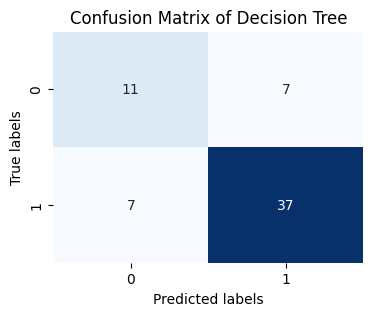

In [213]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(df1, y, test_size=0.2, random_state=42)

# Initialize the Decision Tree classifier
tree = DecisionTreeClassifier(random_state=42)

# Fit the classifier to the training data
tree.fit(X_train, y_train)

# Predict on the test set
y_pred = tree.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(4, 3))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.title("Confusion Matrix of Decision Tree")
plt.show()

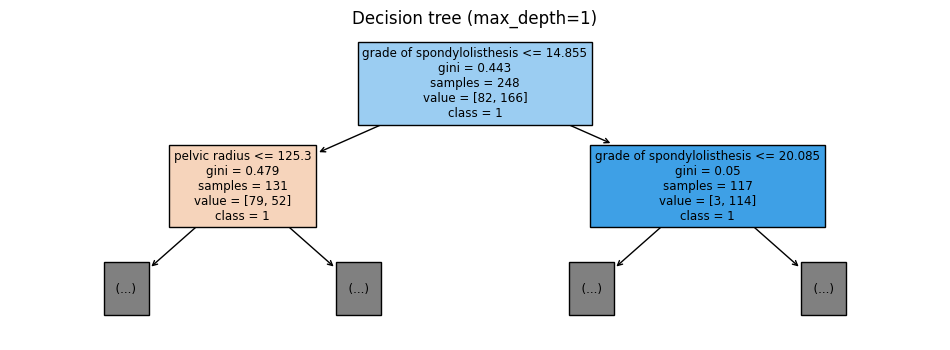

In [214]:
from sklearn.tree import plot_tree

# Initialize the Decision Tree classifier
tree = DecisionTreeClassifier(random_state=42)

# Fit the classifier to the data
tree.fit(X_train, y_train)

# Convert class names to string array
class_names = [str(c) for c in y]

# Plot the first three levels of the decision tree
plt.figure(figsize=(12, 4))
plot_tree(tree, max_depth=1, feature_names=df1.columns, class_names=class_names, filled=True)
plt.title("Decision tree (max_depth=1)")
plt.show()



Best K value: 7


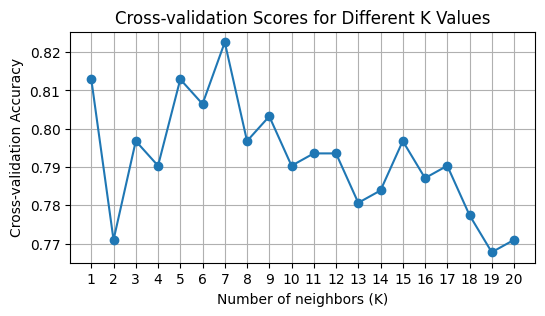

In [215]:
from sklearn.model_selection import cross_val_score
import numpy as np

# Range of K values to test
k_values = range(1, 21)

# Perform cross-validation for each K value
cv_scores = []
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, df1, y, cv=5, scoring='accuracy')  # 5-fold cross-validation
    cv_scores.append(np.mean(scores))

# Find the best K value
best_k = k_values[np.argmax(cv_scores)]
print("Best K value:", best_k)

# Plot cross-validation scores
plt.figure(figsize=(6, 3))
plt.plot(k_values, cv_scores, marker='o')
plt.xlabel('Number of neighbors (K)')
plt.ylabel('Cross-validation Accuracy')
plt.title('Cross-validation Scores for Different K Values')
plt.xticks(k_values)
plt.grid(True)
plt.show()


Accuracy: 0.82


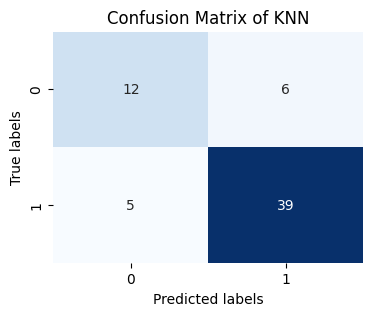

In [216]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df1, y, test_size=0.2, random_state=42)
### 62 test datas in total

# Initialize the KNN classifier
knn = KNeighborsClassifier(n_neighbors=7)

# Train the classifier
knn.fit(X_train, y_train)

# Predict on the test set
y_pred = knn.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", round(accuracy,2))

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(4, 3))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.title("Confusion Matrix of KNN")
plt.show()


D:\anaconda\envs\envs_notebook\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Adjusted Rand Index: 0.11
Silhouette Score: 0.45


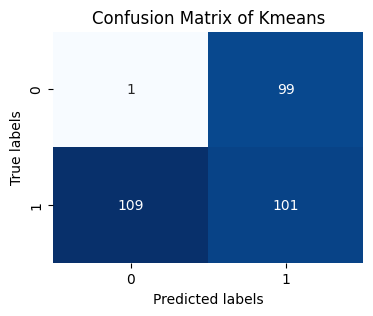

In [217]:
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score, silhouette_score
from sklearn.metrics import confusion_matrix
# Initialize KMeans model
kmeans = KMeans(n_clusters=2, random_state=42)

# Fit KMeans model
kmeans.fit(df1)

# Get cluster labels
kmeans_labels = kmeans.labels_

# Calculate Adjusted Rand Index
ari = adjusted_rand_score(y, kmeans_labels)
print("Adjusted Rand Index:", round(ari,2))

# Calculate Silhouette Score
silhouette = silhouette_score(df1, kmeans_labels)
print("Silhouette Score:", round(silhouette,2))

# Calculate the confusion matrix
cm = confusion_matrix(y, kmeans_labels)

# Plot confusion matrix
plt.figure(figsize=(4, 3))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)

plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.title("Confusion Matrix of Kmeans")
plt.show()

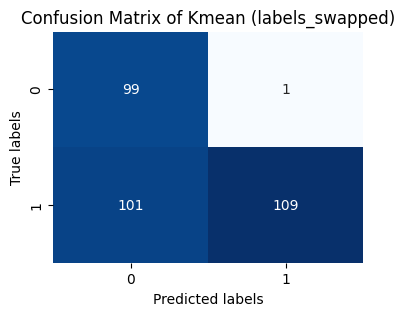

In [218]:
# Swap cluster labels
kmeans_labels_swapped = 1 - kmeans_labels  

cm_swapped = confusion_matrix(y, kmeans_labels_swapped)

plt.figure(figsize=(4, 3))
sns.heatmap(cm_swapped, annot=True, fmt="d", cmap="Blues", cbar=False)

plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.title("Confusion Matrix of Kmean (labels_swapped)")
plt.show()


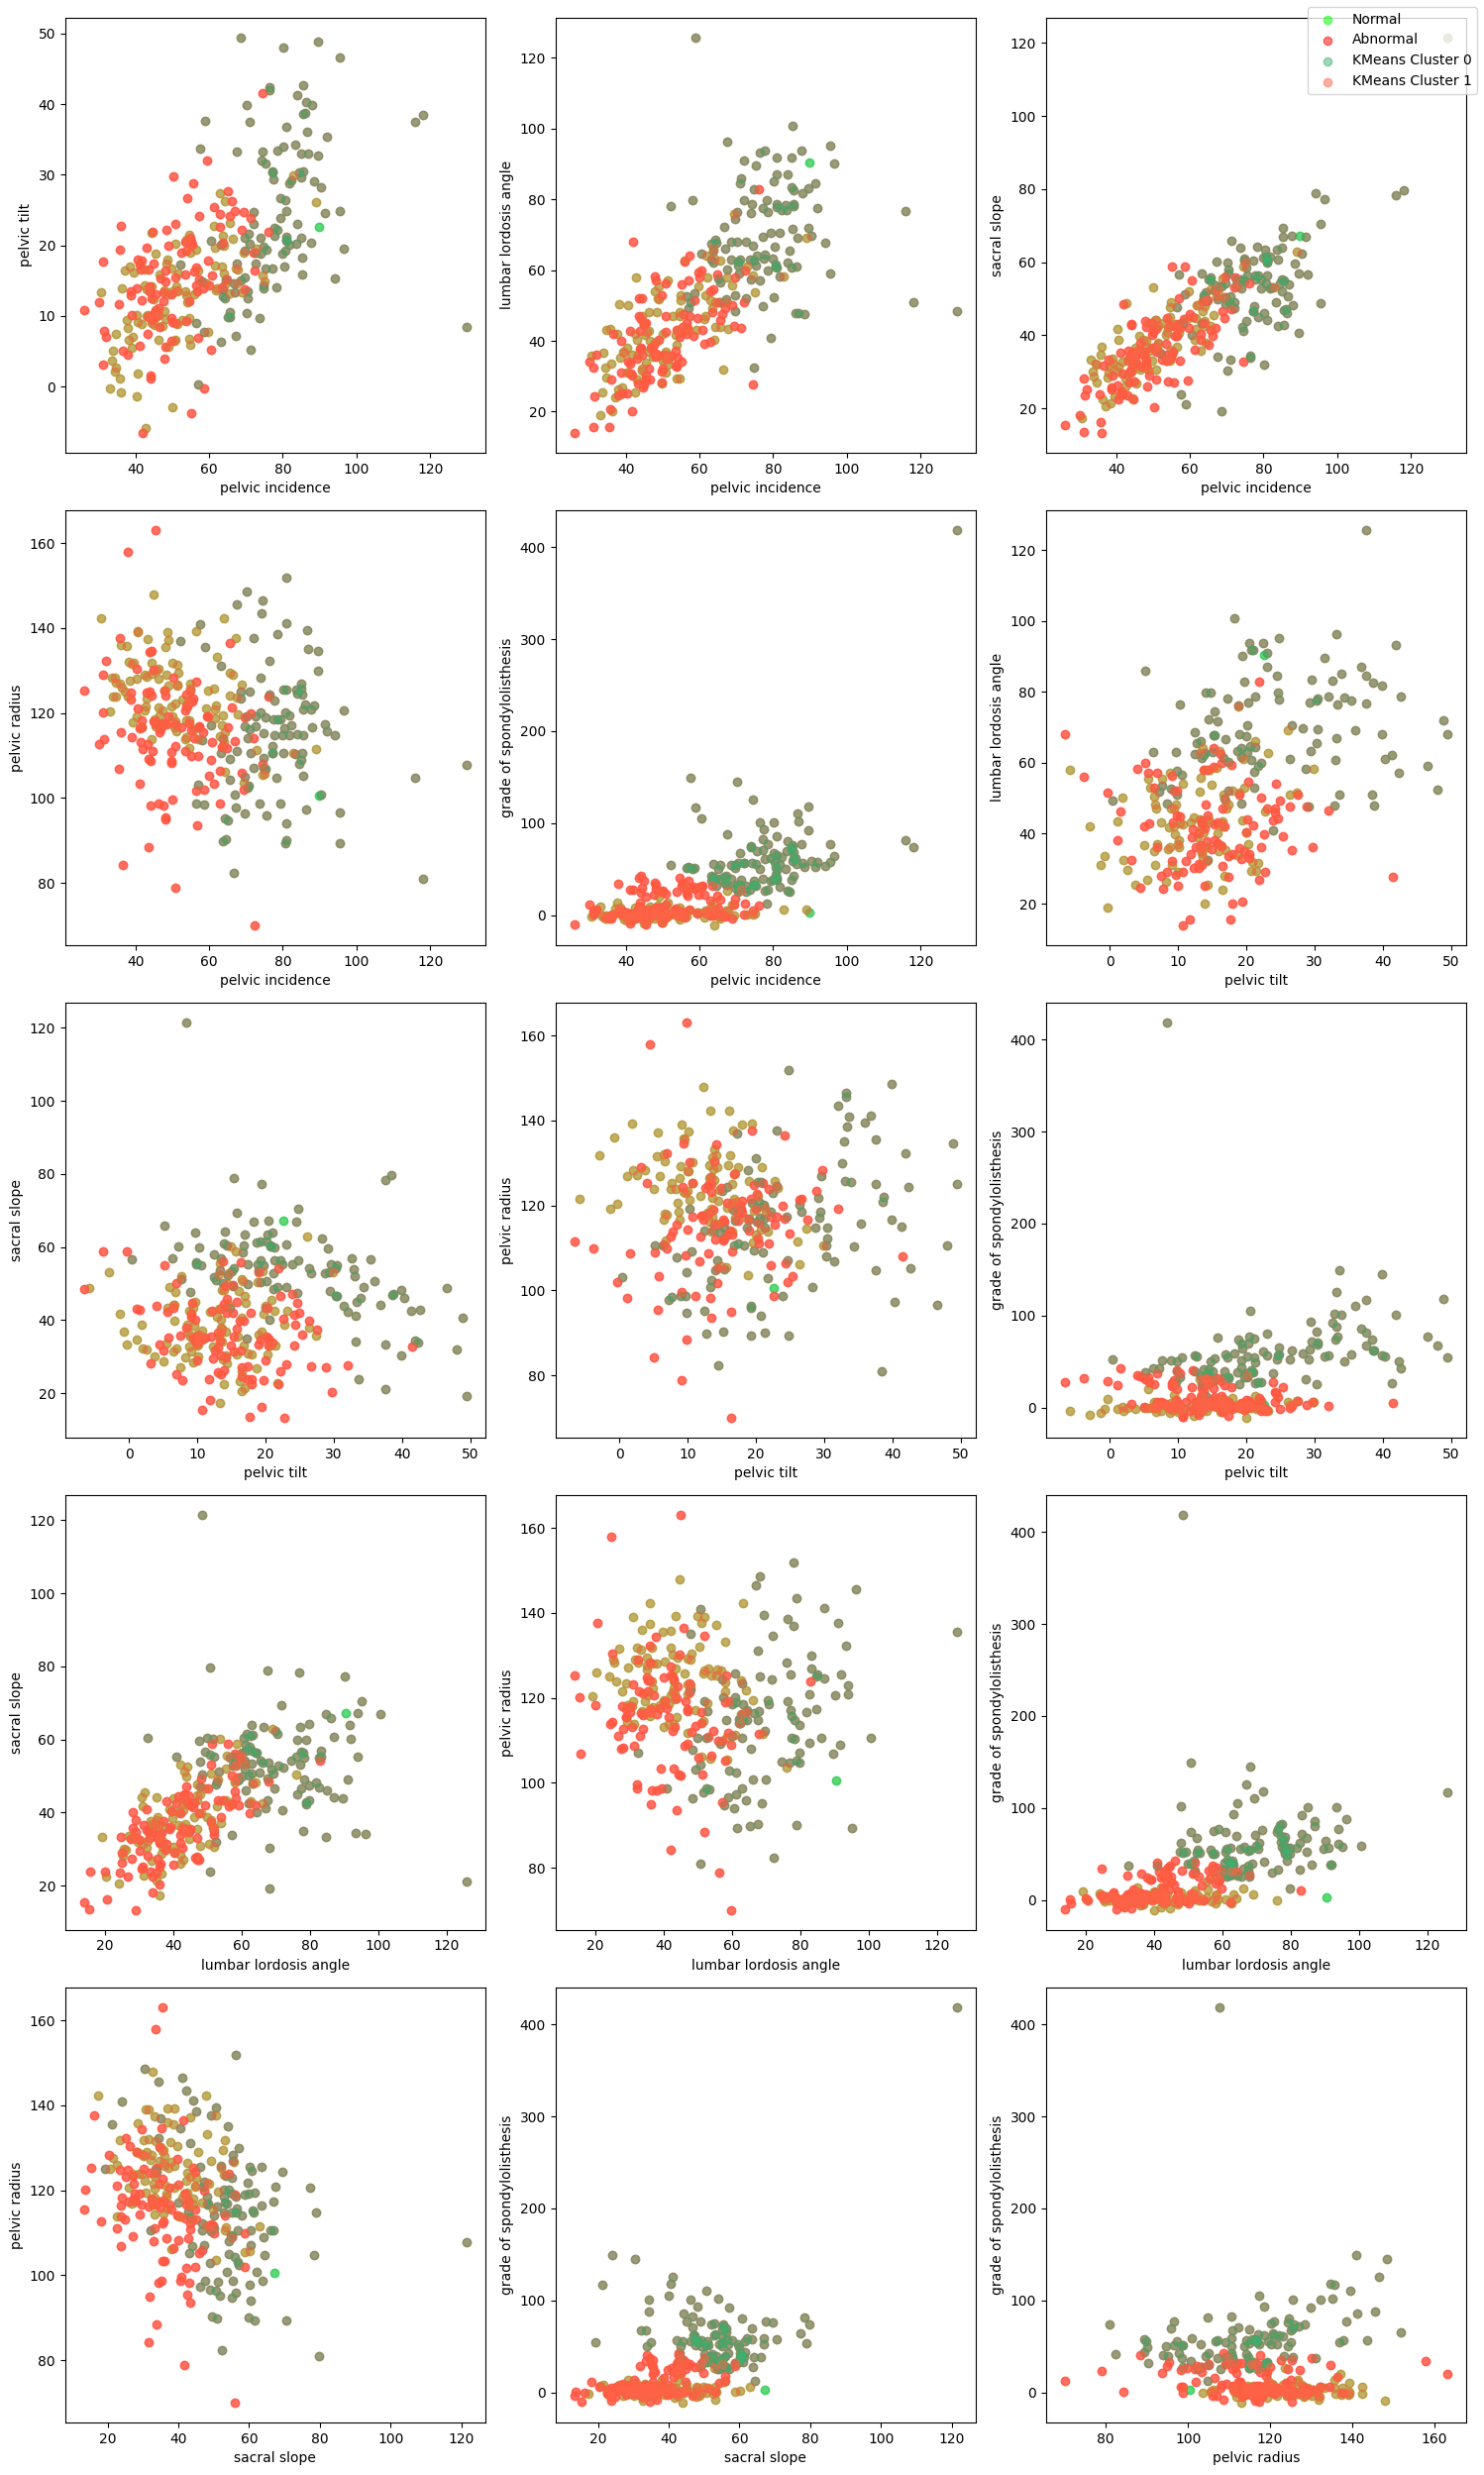

In [219]:
import matplotlib.pyplot as plt
from itertools import combinations

# Assuming df1 is your DataFrame, y is the actual labels, and kmeans_labels is from KMeans

features = df1.columns
feature_combinations = list(combinations(features, 2))

# Define the number of rows and columns for subplots
n_rows = (len(feature_combinations) + 2) // 3  # Adjusted to cover all combinations
n_cols = 3

# Create a figure with subplots
fig, axs = plt.subplots(n_rows, n_cols, figsize=(5*n_cols, 5*n_rows))

# Placeholder for the legend handles
handles = []

for idx, (feature1, feature2) in enumerate(feature_combinations):
    row = idx // n_cols
    col = idx % n_cols
    ax = axs[row, col]
    
    # Plot each combination for actual labels and KMeans labels
    scatter_y0 = ax.scatter(df1[feature1][y==0], df1[feature2][y==0], color='lime', label='Normal', alpha=0.5)  
    scatter_y1 = ax.scatter(df1[feature1][y==1], df1[feature2][y==1], color='red', label='Abnormal', alpha=0.5) 
    scatter_k0 = ax.scatter(df1[feature1][kmeans_labels==0], df1[feature2][kmeans_labels==0], color='mediumseagreen', label='KMeans Cluster 0', alpha=0.5)  
    scatter_k1 = ax.scatter(df1[feature1][kmeans_labels==1], df1[feature2][kmeans_labels==1], color='tomato', label='KMeans Cluster 1', alpha=0.5) 


    ax.set_xlabel(feature1)
    ax.set_ylabel(feature2)

    # Collect legend handles
    if idx == 0:
        handles.extend([scatter_y0, scatter_y1, scatter_k0, scatter_k1])

# Create a unified legend for the entire figure
fig.legend(handles, ['Normal', 'Abnormal', 'KMeans Cluster 0', 'KMeans Cluster 1'], loc='upper right')

# Adjust the layout
plt.tight_layout()
plt.show()
